In [242]:
%matplotlib inline

import sys
import requests

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import seaborn as sns
import matplotlib.dates as mdates

if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO
    
sns.set(style="white", context="talk")

In [243]:
s = requests.get("https://raw.githubusercontent.com/notpeter/crunchbase-data/master/rounds.csv").content
df = pd.read_csv(StringIO(s), parse_dates=['funded_at']) \
    .dropna(subset=['raised_amount_usd']) \
    .sort_values(by='funded_at', ascending=1)

df['funded_at'] = pd.to_datetime(df['funded_at'])

dfb = df.dropna(subset=['company_category_list'])
dfb = dfb[dfb['company_category_list'].str.contains("Bitcoin")]    

df['raised_to_date'] = df['raised_amount_usd'].cumsum()
dfb['raised_to_date'] = dfb['raised_amount_usd'].cumsum()

def plot_funding(df, title, mlrd=False):
    plt.figure(figsize=(8, 6))
    df.columns.name = 'Funding'
    ax = df.plot(x="funded_at", x_compat=True)
    ax.set_xlabel('Time')
    ax.set_ylabel('Funding (%s of $)' % ('Milliards' if mlrd else 'Millions'))
    ax.grid(color='gray', linestyle='dotted')
    ax.yaxis.set_major_formatter(tic.FuncFormatter(lambda x, y: '%0.0f' % (x / pow(10, 9 if mlrd else 6))))
    plt.legend(['Raised', 'Accumulated'], loc='best', frameon=True)
    plt.title(title)
    plt.show()    
    
def sum_year(df, year):
    return df[df['funded_at'].map(lambda x: x.year == year)]['raised_amount_usd'].sum()

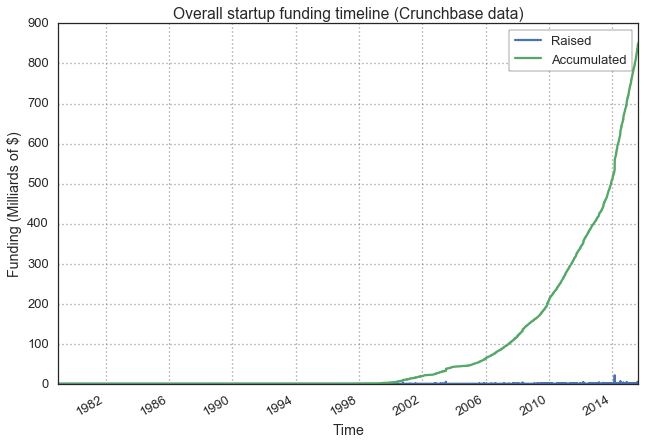

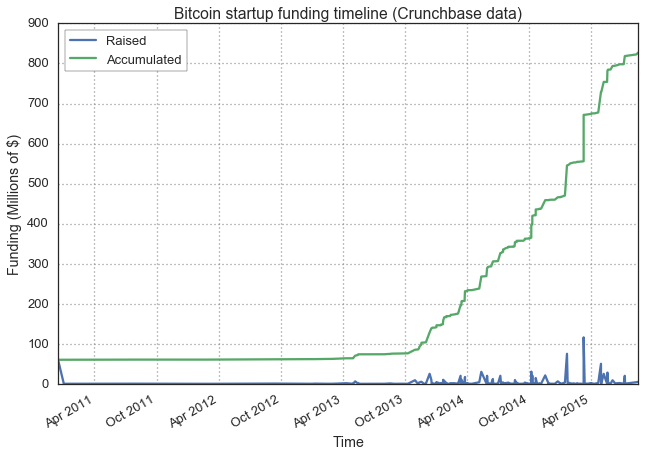

In [244]:
plot_funding(df, 'Overall startup funding timeline (Crunchbase data)', True)
plot_funding(dfb, 'Bitcoin startup funding timeline (Crunchbase data)')

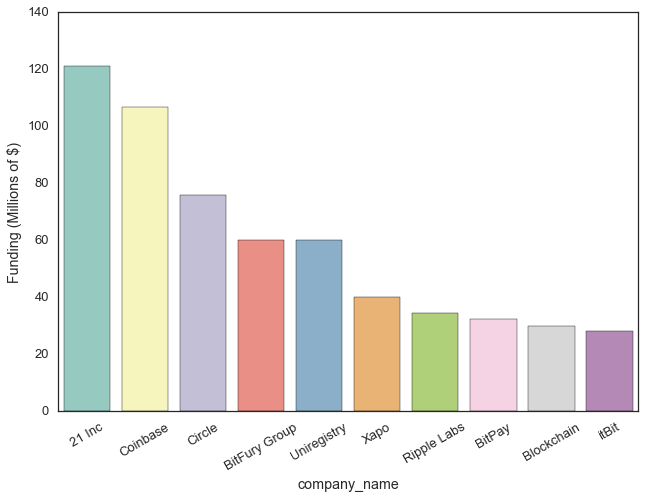

In [245]:
#dfb.groupby('company_name').sum()
dfb2 = dfb.groupby('company_name').sum().sort_values(by='raised_amount_usd', ascending=False).head(10)
g = sns.barplot(dfb2.index, dfb2['raised_amount_usd'], palette="Set3")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_ylabel('Funding (Millions of $)')
g.yaxis.set_major_formatter(tic.FuncFormatter(lambda x, y: '%0.0f' % (x / pow(10, 6))))

In [246]:
dfb['raised_amount_usd'].sum()

827633634.0

In [248]:
sum_year(dfb, 2014)

325509745.0

In [249]:
sum_year(dfb, 2015)

361761257.0